In [41]:
import gcp.bigquery as bq
import pandas as pd

Check for the different tables in the TCGA dataset

In [3]:
d = bq.DataSet('isb-cgc:tcga_201510_alpha')
print 'TABLES:'
for table in d.tables():
  print table.name.table_id

TABLES:
Annotations
Biospecimen_data
Clinical_data
Copy_Number_segments
DNA_Methylation_betas
Protein_RPPA_data
Somatic_Mutation_calls
mRNA_BCGSC_HiSeq_RPKM
mRNA_UNC_HiSeq_RSEM
miRNA_expression


Schema of the clinical data table

In [4]:
%bigquery schema --table isb-cgc:tcga_201510_alpha.Clinical_data

Ethnicity Breakdown:

In [5]:
%%sql --module ethnicity_breakdown

SELECT ethnicity, COUNT(*) AS n
FROM [isb-cgc:tcga_201510_alpha.Clinical_data]
GROUP BY ethnicity
ORDER BY n DESC

In [6]:
bq.Query(ethnicity_breakdown).results()

ethnicity,n
NOT HISPANIC OR LATINO,8167
,2608
HISPANIC OR LATINO,377


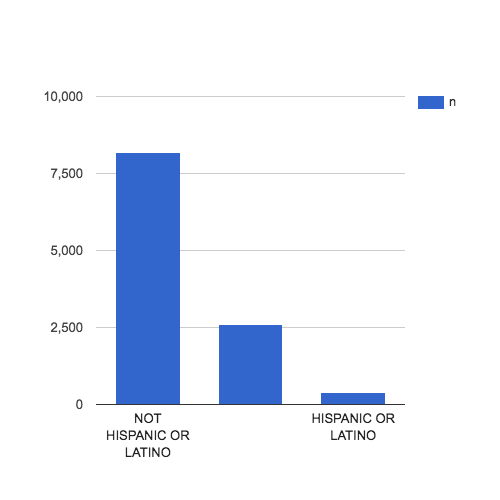

In [7]:
%%chart columns --fields ethnicity,n --data ethnicity_breakdown
width: 500
height: 500

Race Breakdown:

In [8]:
%%sql --module race_breakdown

SELECT race, COUNT(*) AS n
FROM [isb-cgc:tcga_201510_alpha.Clinical_data]
GROUP BY race
ORDER BY n DESC

In [9]:
bq.Query(race_breakdown).results()

race,n
WHITE,8179
,1324
BLACK OR AFRICAN AMERICAN,934
ASIAN,675
AMERICAN INDIAN OR ALASKA NATIVE,27
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,13


A Pandas Dataframe:

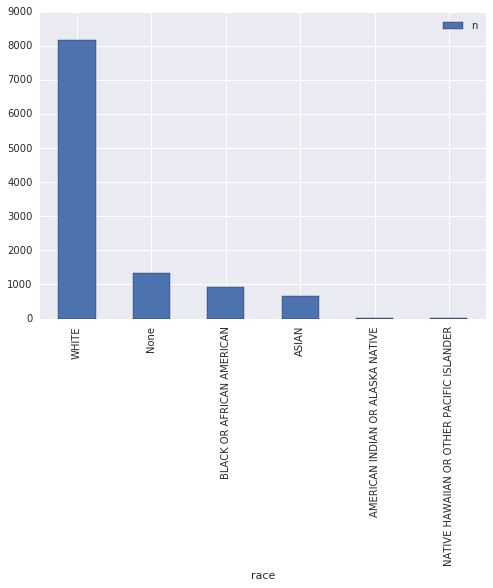

In [10]:
bq.Query(race_breakdown).to_dataframe().set_index('race').plot(kind='bar')

A Datalab Chart

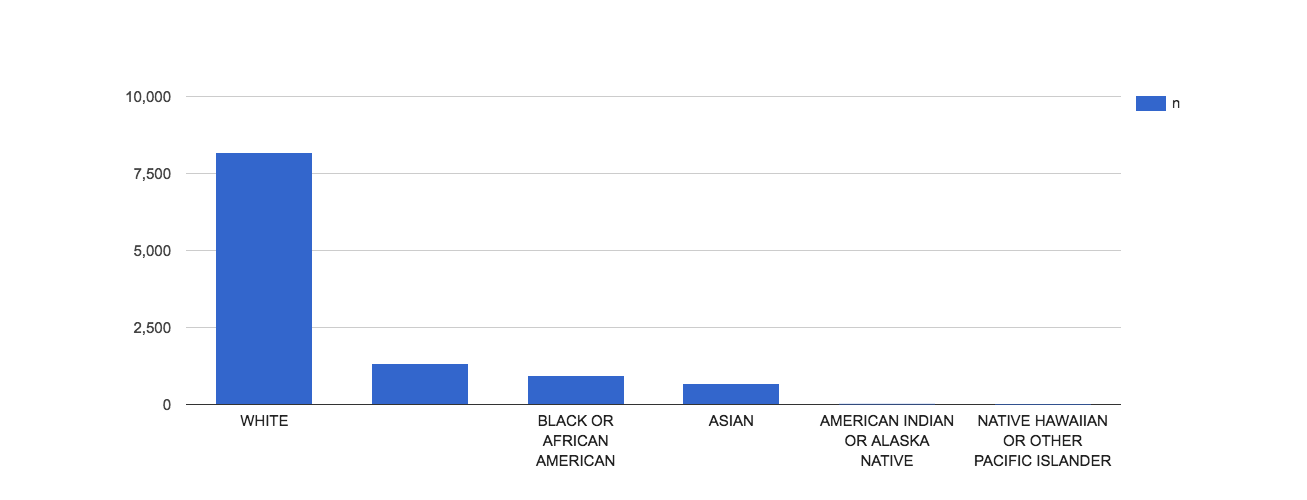

In [11]:
%chart columns --data race_breakdown --fields race,n
height: 500

In [28]:
%%sql --module race_male_breakdown

SELECT race, COUNT(*) AS n
FROM [isb-cgc:tcga_201510_alpha.Clinical_data]
WHERE gender = 'MALE'
GROUP BY race
ORDER BY race, n DESC

In [34]:
%%sql --module race_female_breakdown

SELECT race, COUNT(*) as n
FROM [isb-cgc:tcga_201510_alpha.Clinical_data]
WHERE gender = 'FEMALE'
GROUP BY race
ORDER BY race, n DESC

In [67]:
%%sql --module race_gender_breakdown

SELECT race AS Race, gender, COUNT(*) as n
FROM [isb-cgc:tcga_201510_alpha.Clinical_data]
GROUP BY race, gender
ORDER BY race, n DESC

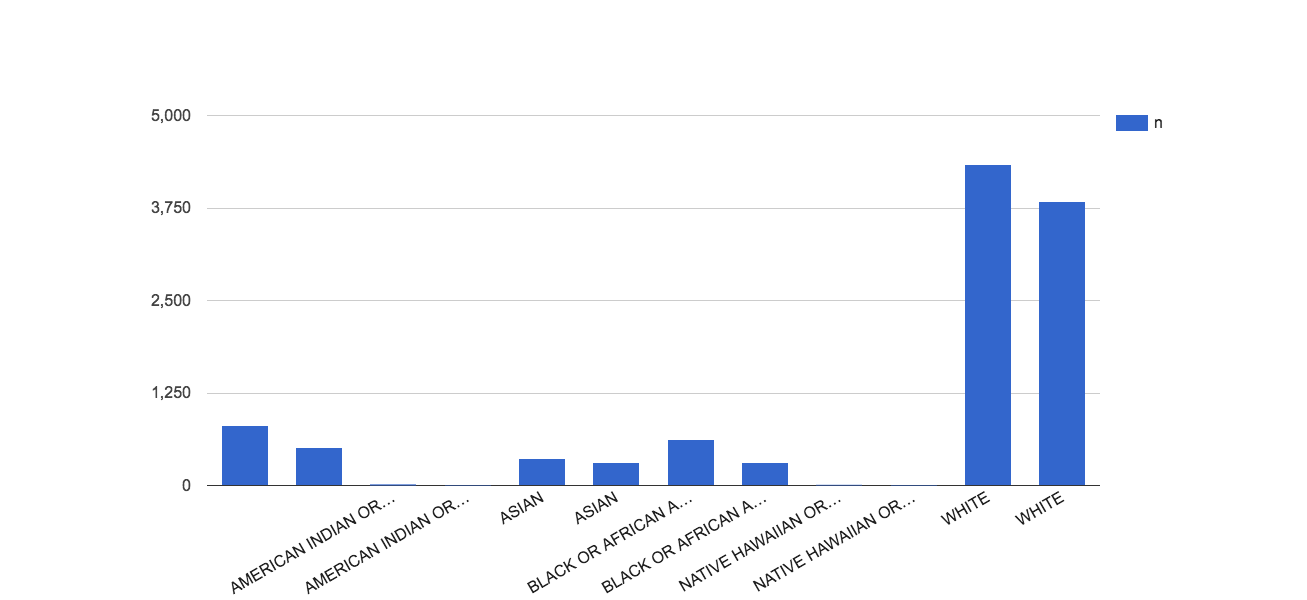

In [57]:
%chart columns --data race_gender_breakdown --fields race,n
height: 600

In [89]:
bq.Query(race_gender_breakdown).results()

Race,gender,n
,MALE,811
,FEMALE,513
AMERICAN INDIAN OR ALASKA NATIVE,FEMALE,19
AMERICAN INDIAN OR ALASKA NATIVE,MALE,8
ASIAN,MALE,367
ASIAN,FEMALE,308
BLACK OR AFRICAN AMERICAN,FEMALE,621
BLACK OR AFRICAN AMERICAN,MALE,313
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,FEMALE,12
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,MALE,1


In [69]:
males = bq.Query(race_male_breakdown).to_dataframe()

In [70]:
females = bq.Query(race_female_breakdown).to_dataframe()

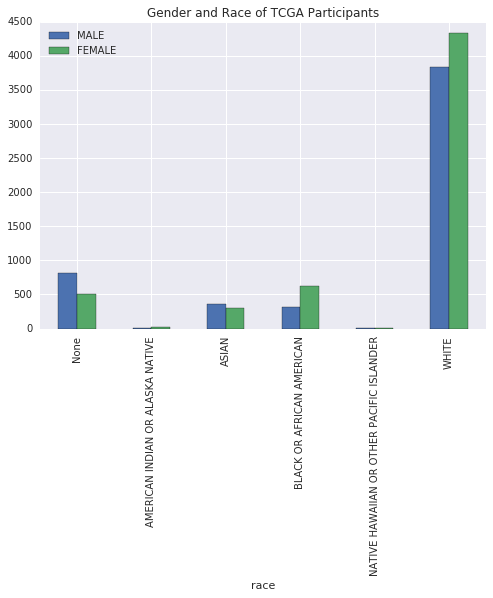

In [99]:
plt = pd.merge(males, females, on='race').plot(kind='bar', x='race', title='Gender and Race of TCGA Participants')
# L = plt.legend()
# L.get_texts()[0].set_text('MALE')
# L.get_texts()[1].set_text('FEMALE')
plt.legend(labels=['MALE', 'FEMALE'], loc=0)

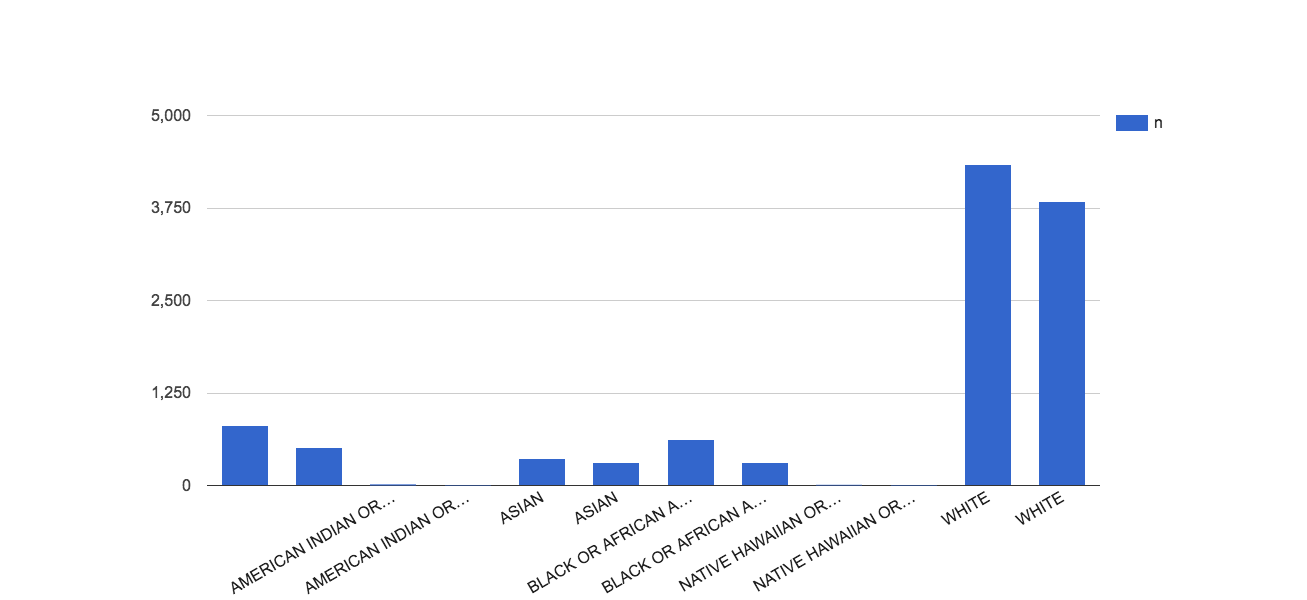

In [18]:
%chart columns --data race_gender_breakdown --field race,n
height: 600

In [19]:
%%sql --module african_american_samples
SELECT ParticipantBarcode
FROM [isb-cgc:tcga_201510_alpha.Clinical_data]
WHERE race = 'BLACK OR AFRICAN AMERICAN'


In [20]:
%%bigquery sample --query african_american_samples --count 5

ParticipantBarcode
TCGA-A3-A8OX
TCGA-A3-A8OW
TCGA-A3-A8OV
TCGA-A3-A8OU
TCGA-76-6656


In [21]:
%bigquery schema --table isb-cgc:tcga_201510_alpha.Annotations

In [100]:
%%sql --module sampling
SELECT * FROM [isb-cgc:tcga_201510_alpha.Clinical_data]

In [101]:
%%bigquery sample --query sampling --count 5

ParticipantBarcode,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,clinical_N,clinical_T,clinical_stage,colorectal_cancer,country,vital_status,days_to_birth,days_to_death,days_to_last_known_alive,days_to_last_followup,days_to_initial_pathologic_diagnosis,days_to_submitted_specimen_dx,ethnicity,frozen_specimen_anatomic_site,gender,gleason_score_combined,histological_type,history_of_colon_polyps,history_of_neoadjuvant_treatment,hpv_calls,hpv_status,icd_10,icd_o_3_histology,icd_o_3_site,lymphatic_invasion,lymphnodes_examined,lymphovascular_invasion_present,menopause_status,mononucleotide_and_dinucleotide_marker_panel_analysis_status,mononucleotide_marker_panel_analysis_status,neoplasm_histologic_grade,new_tumor_event_after_initial_treatment,number_of_lymphnodes_examined,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,year_of_initial_pathologic_diagnosis,pathologic_M,pathologic_N,pathologic_T,pathologic_stage,person_neoplasm_cancer_status,pregnancies,primary_neoplasm_melanoma_dx,primary_therapy_outcome_success,prior_dx,psa_value,race,residual_tumor,tobacco_smoking_history,tumor_tissue_site,tumor_type,venous_invasion,weight,height,BMI
TCGA-DH-A7UV,LGG,TCGA,3B19B5D1-13AF-4669-A082-1BD546048185,DH,49,,352,Nationwide Children's Hospital,,,,,,United States,Alive,-18161,,566,566,0,,NOT HISPANIC OR LATINO,Brain; Supratentorial,MALE,,Astrocytoma,,No,,,C71.0,9401/3,C71.0,,,,,,,G3,NO,,,,2013,,,,,WITH TUMOR,,,Stable Disease,No,,WHITE,,,Central nervous system,,,,,
TCGA-DH-A7UT,LGG,TCGA,B2B57E93-2722-4546-9A0B-20155B86EDEF,DH,30,,352,Nationwide Children's Hospital,,,,,,United States,Dead,-11014,531,531,,0,,NOT HISPANIC OR LATINO,Brain; Supratentorial,MALE,,Astrocytoma,,No,,,C71.0,9401/3,C71.0,,,,,,,G3,YES,,,,2013,,,,,WITH TUMOR,,,Stable Disease,No,,WHITE,,,Central nervous system,,,,,
TCGA-DH-A7UU,LGG,TCGA,977118C8-B446-4696-AA6E-9F1A1055E241,DH,43,,352,Nationwide Children's Hospital,,,,,,United States,Alive,-16037,,417,417,0,,NOT HISPANIC OR LATINO,Brain; Supratentorial,MALE,,Astrocytoma,,No,,,C71.0,9401/3,C71.0,,,,,,,G3,NO,,,,2013,,,,,WITH TUMOR,,,Stable Disease,No,,WHITE,,,Central nervous system,,,,,
TCGA-DH-A7UR,LGG,TCGA,B37ABDC8-B9E3-4F1A-B16D-2E59442DB335,DH,59,,347,Nationwide Children's Hospital,,,,,,United States,Alive,-21803,,1650,1650,0,,NOT HISPANIC OR LATINO,Brain; Supratentorial,FEMALE,,Oligodendroglioma,,No,,,C71.0,9451/3,C71.0,,,,,,,G3,NO,,,,2008,,,,,TUMOR FREE,,,Complete Remission/Response,No,,WHITE,,,Central nervous system,,,,,
TCGA-DH-A7US,LGG,TCGA,82FD02AB-D628-469F-8853-4C603CF04964,DH,50,,347,Nationwide Children's Hospital,,,,,,United States,Alive,-18429,,706,706,0,,NOT HISPANIC OR LATINO,Brain; Supratentorial,MALE,,Oligodendroglioma,,No,,,C71.0,9450/3,C71.0,,,,,,,G2,NO,,,,2013,,,,,WITH TUMOR,,,Stable Disease,No,,WHITE,,,Central nervous system,,,,,


In which study are African-American women most represented?

In [121]:
%%sql --module tcga_afr_amr_women_cohort
# DISTINCT not supported -- have to use GROUPBY
SELECT ParticipantBarcode 
FROM [isb-cgc:tcga_201510_alpha.Clinical_data]
WHERE race = 'BLACK OR AFRICAN AMERICAN'
AND gender = 'FEMALE'


In [122]:
print bq.Query(tcga_afr_amr_women_cohort).results().length


621


In [123]:
%%sql --module study_breakdown
SELECT Study, COUNT(*) as number_of_particpants
FROM tcga_afr_amr_women_cohort
GROUP BY Study
ORDER BY 2

In [124]:
bq.Query(study_breakdown).results()

Exception: invalid: Table name cannot be resolved: dataset name is missing.